###### Clustering


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=500,centers=3)
print(X.shape,y.shape)

(500, 2) (500,)


c:\users\anuj_chauhan\appdata\local\programs\python\python35\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


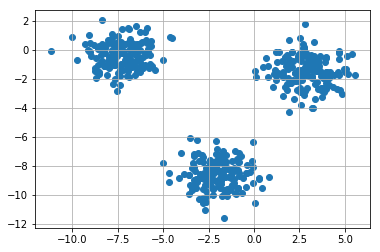

In [3]:
plt.figure(0)
plt.grid("on")
plt.scatter(X[:,0],X[:,1])
plt.show()

In [4]:
""""k=3
colors=['green','blue','red','brown','orange','pink']
clusters={}
for kx in range(k):
    center=np.random.random((X.shape[1],))*10-3
    points=[]
    cluster={'center':center,
             'points':points,
             'color':colors[kx]
    }
    clusters[kx]=cluster
    print(clusters)
             

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-4-2ae93bf8aa6c>, line 13)

In [ ]:
def distance(x1,x2):
    return(np.sqrt(np.sum((x1-x2)**2)))

In [ ]:
""""for ix in range(X.shape[0]):
    dist=[]
    curr_x=X[ix]
    for kx in range(k):
        d=distance(curr_x,clusters[kx]['center'])
        dist.append(d)
    current_cluster_id=np.argmin(dist)
    clusters[current_cluster_id]['points'].append(curr_x)

    
    
    

    

In [ ]:
""""for kx in range(k):
    pts=np.array(clusters[kx]['points'])
    print(pts.shape)
    clusters[kx]['coords']=pts
plt.figure(0)
plt.grid('on')
for kx in range(k):
    pts=clusters[kx]['coords']
    try:
        plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
    except:
        pass
    center=clusters[kx]['center']
    plt.scatter(center[0], center[1], color='grey', s=100, marker='*')
for kx in range(k):
    if clusters[kx]['coords'].shape[0]>0:
        new_center=clusters[kx]['coords'].mean(axis=0)
    else:
        new_center=clusters[kx]['center']
    clusters[kx]['center']=new_center
    clusters[kx]['points']=[]
    
plt.figure(1)
plt.grid('on')
for kx in range(k):
    pts=clusters[kx]['coords']
    try:
        plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
    except:
        pass
    
    center=clusters[kx]['center']
    plt.scatter(center[0],center[1],color='black',s=100,marker='*')
    
    

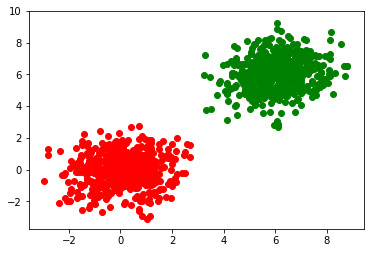

In [5]:
## Generation of Input data
mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1.0, 0.1], [0.1, 1.1]])

mean_02 = np.array([6.0, 6.0])
cov_02 = np.array([[1.0, 0.1], [0.1, 1.1]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

plt.scatter(dist_01[:, 0], dist_01[:, 1], c='red')
plt.scatter(dist_02[:, 0], dist_02[:, 1], c='green')

plt.show()

## Input Dataset
data = np.vstack((dist_01, dist_02))
np.random.shuffle(data)

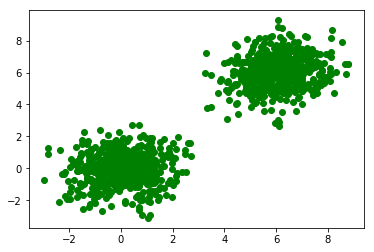

In [6]:
data.shape
X.shape
plt.scatter(data[:, 0], data[:, 1], c='green')

In [30]:
k=3
clusters={}
colors=['red', 'green', 'grey', 'blue']
for c in range(k):
    cluster_vals={
        'centroid':np.random.random((data.shape[1],))*10-3,
        'points':[],
        'color':colors[c],
        'history':[]
    }
    clusters[c]=cluster_vals

In [31]:
## Distance Function
def distance(p1, p2):
    '''Eucledian Distance Function'''
    return np.sqrt(((p1-p2)**2).sum())




In [32]:
for cx in clusters:
    print (cx, clusters[cx])

0 {'history': [], 'centroid': array([-0.26284024,  6.58946199]), 'color': 'red', 'points': []}
1 {'history': [], 'centroid': array([ 2.92285321, -0.7463501 ]), 'color': 'green', 'points': []}
2 {'history': [], 'centroid': array([3.8533385 , 3.76208034]), 'color': 'grey', 'points': []}


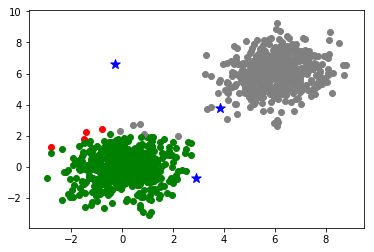

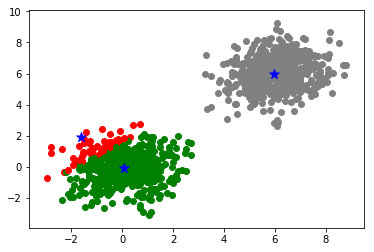

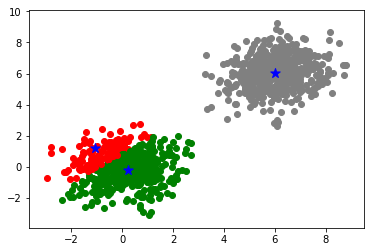

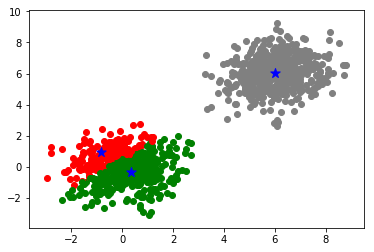

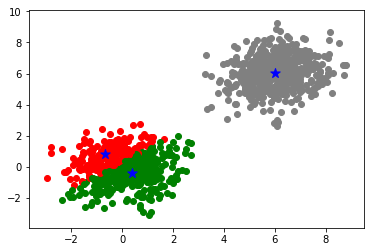

In [33]:
for ix in range(5):
    plt.figure(ix)
    
    for px in range(data.shape[0]):
        dist=[]
        for cx in range(k):
            d=distance(data[px],clusters[cx]['centroid'])
            dist.append(d)
        dist=np.array(dist)
        cluster_id=np.argmin(dist)
        clusters[cluster_id]['points'].append(data[px])
        plt.scatter(data[px, 0], data[px, 1], c=clusters[cluster_id]['color'])
    
    
    for cx in range(k):
        plt.scatter(clusters[cx]['centroid'][0], clusters[cx]['centroid'][1], c='blue',marker='*',s=100)
        old_centroid=clusters[cx]['centroid']
        clusters[cx]['history'].append(old_centroid)
        if len(clusters[cx]['points'])>0:
            new_centroid = np.mean(np.array(clusters[cx]['points']), axis=0)
            clusters[cx]['centroid'] = new_centroid
        clusters[cx]['points']=[]
    plt.show()
            